In [57]:
import pandas as pd

# Read the CSV file
dataset = pd.read_csv('Social_Network_Ads.csv')
print(dataset.head()) # Display first few rows

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [58]:
dataset.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [59]:
# Feature matrix (Age, EstimatedSalary)
x=dataset.iloc[:, 2:4].values
# Target variable (Purchased)
y=dataset.iloc[:,-1].values

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)


In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [62]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(
    criterion="entropy"
)
classifier.fit(x_train,y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [63]:
y_pred=classifier.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8375

<Axes: >

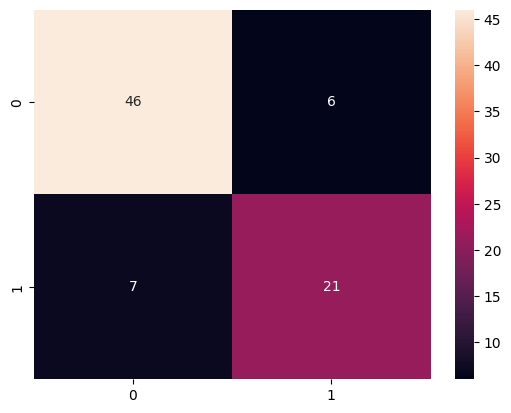

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

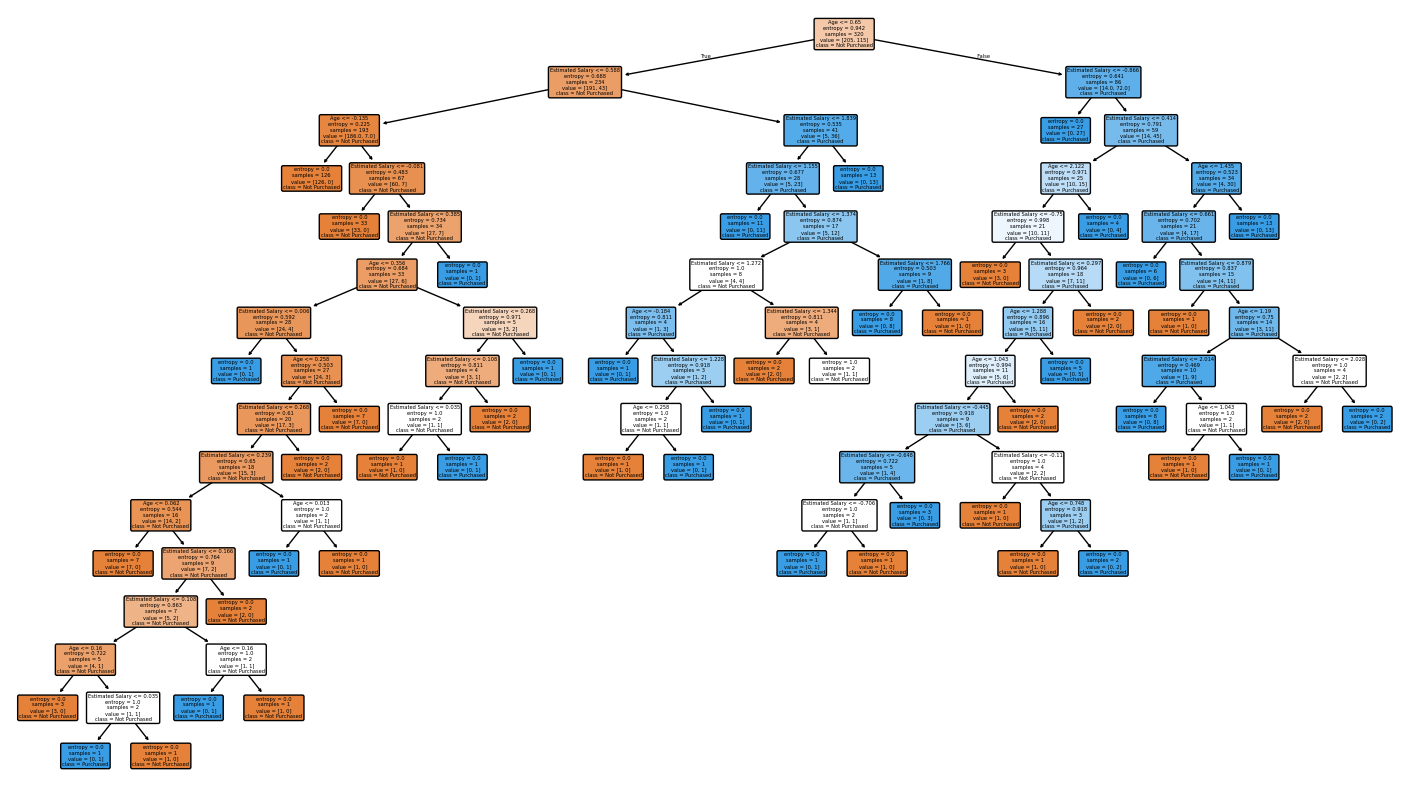

In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plot_tree(
    classifier,
    feature_names=["Age","Estimated Salary"],
    class_names=["Not Purchased","Purchased"],
    filled=True,
    rounded=True
)
plt.show()


In [67]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4
)
classifier.fit(x_train , y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [68]:
y_pred=classifier.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9125

<Axes: >

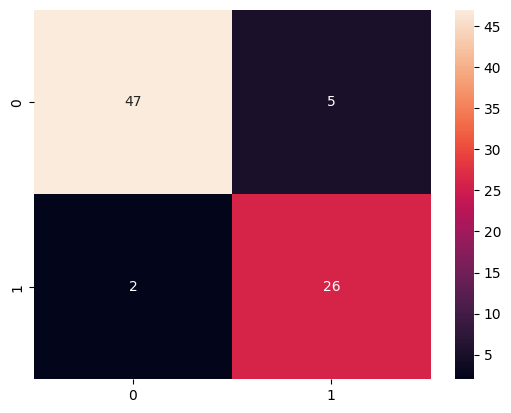

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

Using Titanic passengeer data, our goal is to predict whether a passenger survived or not based on their details

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [36]:
df=sns.load_dataset("titanic")

In [37]:
df=df[["survived","pclass", "sex", "age", "fare", "embarked"]]

In [39]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
dtype: int64

In [ ]:
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)


C:\Users\lekha\AppData\Local\Temp\ipykernel_25084\2526786661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["sex"]=encoder.fit_transform(df["sex"])
df["embarked"]=encoder.fit_transform(df["embarked"])

In [50]:
X=df.drop("survived", axis=1)
y=df["survived"]

X.head(), y.head()

(   pclass  sex   age     fare  embarked
 0       3    1  22.0   7.2500         2
 1       1    0  38.0  71.2833         0
 2       3    0  26.0   7.9250         2
 3       1    0  35.0  53.1000         2
 4       3    1  35.0   8.0500         2,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64)

In [52]:
model=DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)
model.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [54]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size=0.2 , random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9125

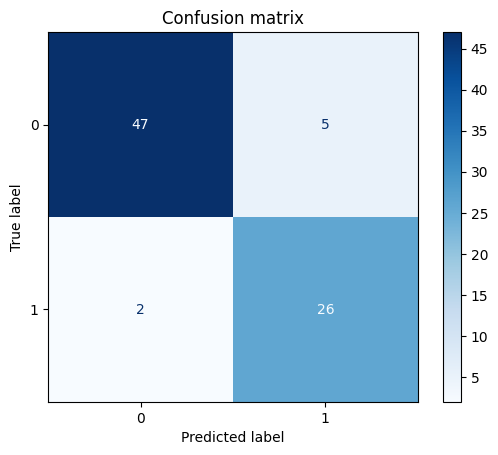

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    values_format='d'
)
plt.title("Confusion matrix")
plt.show()

In [74]:
new_passenger = pd.DataFrame([[3, 1, 25, 7, 2]], columns=X.columns)

prediction = model.predict(new_passenger)
prediction

array([0])

In [75]:
if prediction[0]==1:
    print("Passenger is likely to Survive")
else:
    print("Passenger is likely NOT to survive")

Passenger is likely NOT to survive
